In [1]:
import pandas as pd
data_2021 = pd.read_csv("data recuperada/data_sin_outliers.csv")

In [2]:
data_2021.columns

Index(['id', 'concat', 'publicada', 'created_at', 'data_source', 'tipo',
       'sub_tipo', 'precio_clp', 'precio_uf', 'region', 'comuna', 'latitude',
       'longitude', 'total_o_terreno', 'util_o_construido', 'active',
       'fecha_finalizacion', 'precio_clp_inicial', 'precio_uf_inicial',
       'descripcion_sin_saltos', 'direccion_sin_saltos', 'descripcion_2',
       'region_norm', 'comuna_norm', 'comuna_match', 'superficies_dict',
       'mayor_superficie', 'diferencia_pct', 'diferencia_abs', 'semestre',
       'descripcion_normalizada', 'duplicados_con', 'duplicado',
       'valor_uf_inicial', 'valor_uf', 'margen_uf_inicial', 'margen_uf',
       'dif_pct_abs', 'UF_Ha', 'total_o_terreno_ha', 'UF_Ha_inicial',
       'superficie_Ha', 'valores_terreno', 'costo_m2_uf', 'rango_superficie',
       'is_outlier'],
      dtype='object')

In [4]:
import pandas as pd

# Función para asignar el rango según el tamaño de la superficie
def asignar_rango(superficie):
    if 100 <= superficie <= 499:
        return '100-499 m2'
    elif 500 <= superficie <= 4999:
        return '500-4999 m2'
    elif 5000 <= superficie <= 10000:
        return '5000-10000 m2'
    elif 10001 <= superficie <= 50000:
        return '10001-50000 m2'
    elif 50001 <= superficie <= 100000:
        return '50001-100000 m2'
    elif superficie > 100000:
        return '>100000 m2'
    else:
        return 'Fuera de rango'  # Opcional, para valores fuera del rango definido

# Aplicar la función a la columna 'mayor_superficie' y actualizar 'rango_superficie'
data_2021['rango_superficie'] = data_2021['total_o_terreno'].apply(asignar_rango)

# Verificar el resultado
print(data_2021[['total_o_terreno', 'rango_superficie']].head())


   total_o_terreno rango_superficie
0            400.0       100-499 m2
1            185.0       100-499 m2
2            350.0       100-499 m2
3            455.0       100-499 m2
4            422.0       100-499 m2


In [5]:
import pandas as pd

# Filtrar los datos para la comuna PICHILEMU y el rango de superficie de 10001 a 50000 m2
filtro_pichilemu = data_2021[(data_2021['comuna_match'] == 'PICHILEMU') & 
                             (data_2021['rango_superficie'] == '10001-50000 m2')]

# Calcular la media y mediana del costo_m2_uf en este filtro
media_costo = filtro_pichilemu['costo_m2_uf'].mean()
mediana_costo = filtro_pichilemu['costo_m2_uf'].median()

# Mostrar los resultados
print(f"Media del costo_m2_uf para PICHILEMU en el rango 10001-50000 m2: {media_costo}")
print(f"Mediana del costo_m2_uf para PICHILEMU en el rango 10001-50000 m2: {mediana_costo}")


Media del costo_m2_uf para PICHILEMU en el rango 10001-50000 m2: 0.523447101592871
Mediana del costo_m2_uf para PICHILEMU en el rango 10001-50000 m2: 0.2236381887403318


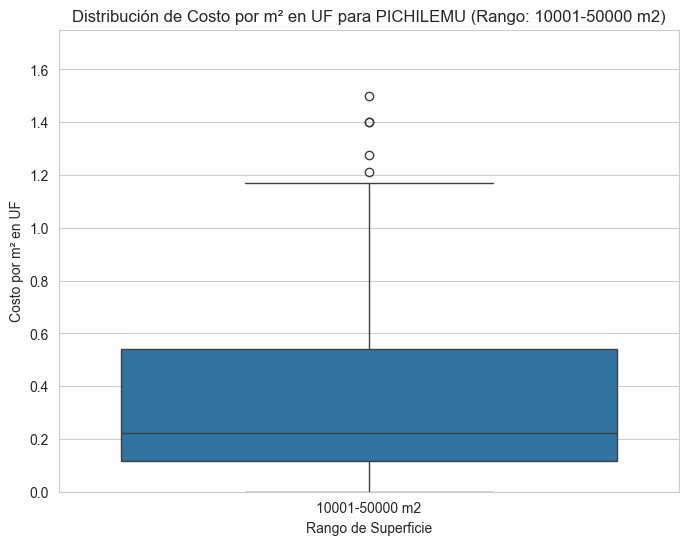

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


# Crear el boxplot de la distribución de costo_m2_uf con límite en el eje Y
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtro_pichilemu, x='rango_superficie', y='costo_m2_uf')
plt.title('Distribución de Costo por m² en UF para PICHILEMU (Rango: 10001-50000 m2)')
plt.xlabel('Rango de Superficie')
plt.ylabel('Costo por m² en UF')
plt.ylim(0, 1.75)  # Límite en el eje Y
plt.show()